In [2]:
import pandas as pd

orders_path = "C:/DataCapstone/customer-behavior-ecommerce/data/cleaned/cleaned_orders.csv"
customers_path = "C:/DataCapstone/customer-behavior-ecommerce/data/cleaned/cleaned_customers.csv"

In [178]:
df_orders = pd.read_csv(orders_path)
df_customers = pd.read_csv(customers_path)

### Create a customer name → ID mapping within the orders file

In [179]:
# Generate a unique ID for each customer name in df_orders
unique_names = df_orders['customer_name'].unique()
name_to_id = {name: f"CUST{idx+1001}" for idx, name in enumerate(unique_names)}

### Apply this mapping to create a new customer_id column

In [180]:
df_orders['customer_id'] = df_orders['customer_name'].map(name_to_id)

### Drop the original customer name column (optional for anonymization)

In [ ]:
# work with the df_orders and df_customers DataFrames
print("Orders DataFrame:")
print(df_orders.head())

print("\nCustomers DataFrame:")
print(df_customers.head())

Orders DataFrame:
   order_number state_code   customer_name  order_date     status  \
0      139374.0         AP     Adhir Samal  2020-11-01  Delivered   
1      139375.0         AP  Dannana Jhammi  2020-11-01  Delivered   
2      139376.0         AS     Vipin Kumar  2020-11-01  Delivered   
3      139377.0         BR   Ranjeet Kumar  2020-11-01  Delivered   
4      139378.0         CG   Sajal Singhal  2020-11-01      Order   

                    product      category     brand    cost    sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   quantity  total_cost  total_sales assigned_supervisor  spending_ratio  
0       1.0      6500.0       8450.0         Ajay Sharma   

In [217]:
# Save to cleaned or anonymized folder
anonymized_path = "C:/DataCapstone/customer-behavior-ecommerce/data/cleaned/orders_anonymized.csv"
df_orders.to_csv(anonymized_path, index=False)
print("Anonymized orders data saved successfully!")


Anonymized orders data saved successfully!


In [234]:
# Drop the customer_name column
df_customers.drop(columns=['customer_name'], inplace=True)

# Confirm
print(df_customers.head())


   customer_id     purchase_date_x product_category  product_price  quantity  \
0        46251 2020-09-08 09:38:32      Electronics             12         3   
1        46251 2022-03-05 12:56:35             Home            468         4   
2        46251 2022-05-23 18:18:01             Home            288         2   
3        46251 2020-11-12 13:13:29         Clothing            196         1   
4        13593 2020-11-27 17:55:11             Home            449         1   

   total_purchase_amount payment_method  customer_age  returns  age  gender  \
0                    740    Credit Card            37      0.0   37    Male   
1                   2739         PayPal            37      0.0   37    Male   
2                   3196         PayPal            37      0.0   37    Male   
3                   3509         PayPal            37      0.0   37    Male   
4                   3452    Credit Card            49      0.0   49  Female   

   churn  purchase_frequency     purchase_da

In [250]:
import pandas as pd

# File paths
cleaned_orders_path = "C:/DataCapstone/customer-behavior-ecommerce/data/cleaned/cleaned_orders.csv"
cleaned_customers_path = "C:/DataCapstone/customer-behavior-ecommerce/data/cleaned/cleaned_customers.csv"
anonymized_orders_path = "C:/DataCapstone/customer-behavior-ecommerce/data/cleaned/orders_anonymized.csv"

# Load datasets
df_cleaned_orders = pd.read_csv(cleaned_orders_path)
df_cleaned_customers = pd.read_csv(cleaned_customers_path)
df_anonymized_orders = pd.read_csv(anonymized_orders_path)

# Print number of records
print("✅ Cleaned Orders - Number of records:", len(df_cleaned_orders))
print("✅ Cleaned Customers - Number of records:", len(df_cleaned_customers))
print("✅ Anonymized Orders - Number of records:", len(df_anonymized_orders))


✅ Cleaned Orders - Number of records: 5095
✅ Cleaned Customers - Number of records: 250000
✅ Anonymized Orders - Number of records: 5095


In [265]:
import pandas as pd
from datetime import datetime

df_orders = pd.read_csv(orders_path)
df_customers = pd.read_csv(customers_path)

# Spending Ratio
df_orders["spending_ratio"] = df_orders["total_sales"] / df_orders["total_cost"]

# Purchase Frequency (number of purchases per customer)
purchase_frequency = df_customers.groupby("customer_id").size().reset_index(name="purchase_frequency")

# Days Since Last Purchase
df_customers["purchase_date"] = pd.to_datetime(df_customers["purchase_date"])
last_purchase = df_customers.groupby("customer_id")["purchase_date"].max().reset_index()
last_purchase["days_since_last_purchase"] = (datetime.now() - last_purchase["purchase_date"]).dt.days

# Merge frequency and recency features
df_customer_features = pd.merge(purchase_frequency, last_purchase, on="customer_id")

# Customer Value Segmentation (simple example based on frequency)
df_customer_features["value_segment"] = pd.cut(
    df_customer_features["purchase_frequency"],
    bins=[0, 2, 5, float("inf")],
    labels=["Low", "Medium", "High"]
)

# Merge back to original customer DataFrame (optional)
df_customers = pd.merge(df_customers, df_customer_features, on="customer_id", how="left")



df_customers.head()



,customer_id,purchase_date_x,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,customer_name,age,gender,churn,purchase_frequency,purchase_date_y,days_since_last_purchase,value_segment
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,4,2022-05-23 18:18:01,1045,Medium
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,4,2022-05-23 18:18:01,1045,Medium
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,4,2022-05-23 18:18:01,1045,Medium
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,4,2022-05-23 18:18:01,1045,Medium
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,5,2023-04-15 03:02:33,718,Medium


In [266]:
# If the source is df_customers
df_customer_features = df_customers.copy()

# Then calculate spending_ratio
df_customer_features["spending_ratio"] = df_customer_features["total_purchase_amount"] / (
    df_customer_features["product_price"] * df_customer_features["quantity"]
)


In [279]:
df_features = df_customers.copy()

df_features["spending_ratio"] = df_features["total_purchase_amount"] / (
    df_features["product_price"] * df_features["quantity"]
)

print(df_features[["customer_id", "spending_ratio"]].head())


   customer_id  spending_ratio
0        46251       20.555556
1        46251        1.463141
2        46251        5.548611
3        46251       17.903061
4        13593        7.688196


### Spending ratio

In [280]:
df_orders["spending_ratio"] = df_orders["total_sales"] / df_orders["total_cost"]


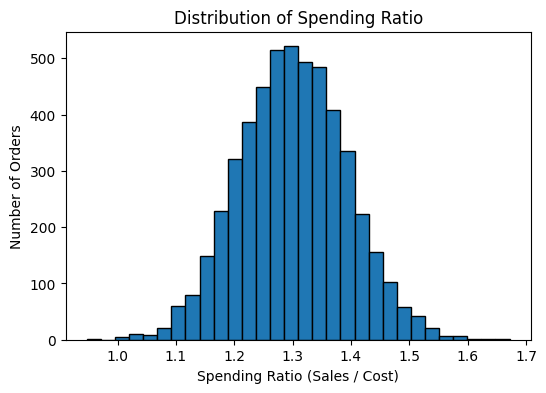

In [291]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate small variance for testing (optional)
df_orders["spending_ratio"] = df_orders["spending_ratio"] * np.random.normal(1, 0.05, len(df_orders))

plt.figure(figsize=(6,4))
df_orders["spending_ratio"].hist(bins=30, edgecolor='black')
plt.title("Distribution of Spending Ratio")
plt.xlabel("Spending Ratio (Sales / Cost)")
plt.ylabel("Number of Orders")
plt.grid(False)
plt.show()


### Customer Purchase Frequency Distribution

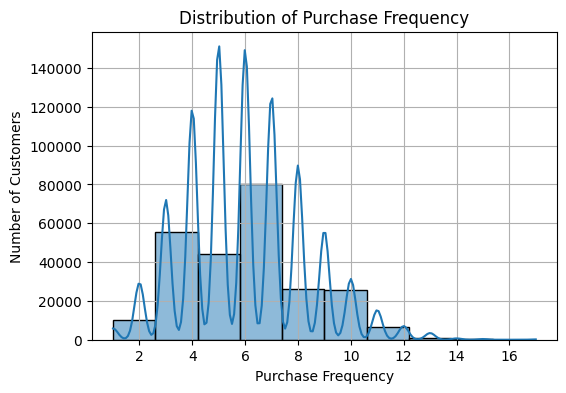

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_customer_features["purchase_frequency"], bins=10, kde=True)
plt.title("Distribution of Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()



### Days Since Last Purchase

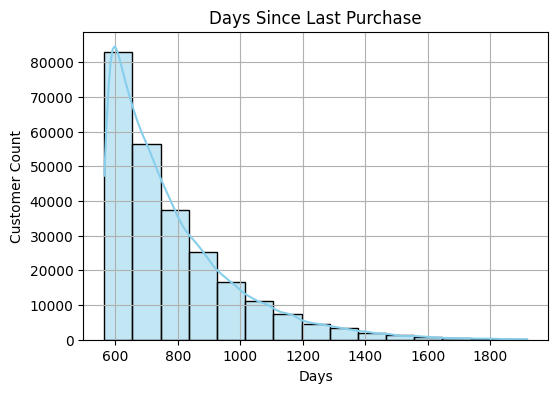

In [301]:

plt.figure(figsize=(6,4))
sns.histplot(df_customer_features["days_since_last_purchase"], bins=15, kde=True, color='skyblue')
plt.title("Days Since Last Purchase")
plt.xlabel("Days")
plt.ylabel("Customer Count")
plt.grid(True)
plt.show()


### ###  Customer Value Segments

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11764\3327093058.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_customer_features,


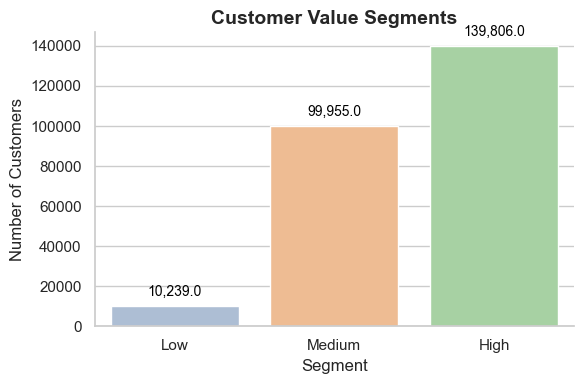

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_customer_features,
                x="value_segment", 
                order=["Low", "Medium", "High"], 
                palette=["#a6bddb", "#fdbb84", "#a1d99b"])

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height + 5000), 
                ha='center', fontsize=10, color='black')

# Title and labels
plt.title("Customer Value Segments", fontsize=14, fontweight='bold')
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Remove spines
sns.despine()

# Tight layout and show
plt.tight_layout()
plt.show()



### Customer Age Distribution

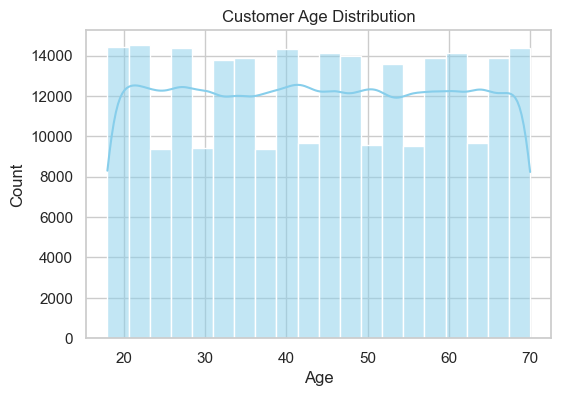

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df_customers["age"], bins=20, kde=True, color="skyblue")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Customer Gender Distribution

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11764\3671665548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customers, x="gender", palette="pastel")


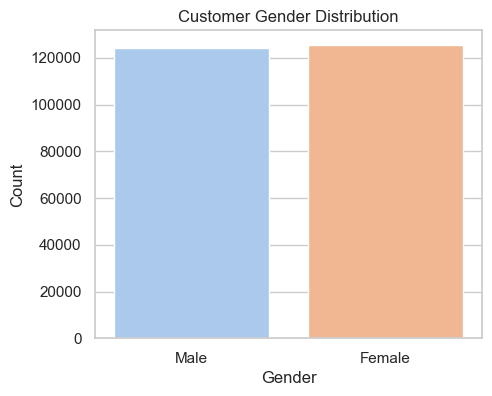

In [347]:
plt.figure(figsize=(5,4))
sns.countplot(data=df_customers, x="gender", palette="pastel")
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### Churn by age

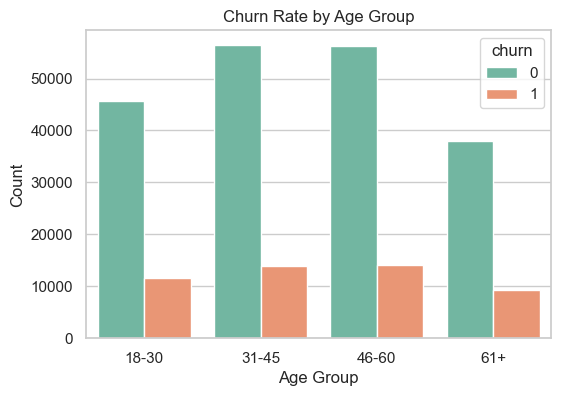

In [348]:
# Create age groups
df_customers["age_group"] = pd.cut(df_customers["age"], bins=[18, 30, 45, 60, 80],
                                   labels=["18-30", "31-45", "46-60", "61+"])

plt.figure(figsize=(6,4))
sns.countplot(data=df_customers, x="age_group", hue="churn", palette="Set2")
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


### Age by Value segment

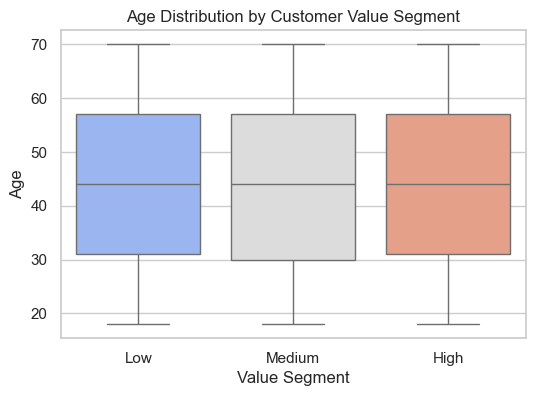

In [349]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_customers, x="value_segment", y="age", hue="value_segment", palette="coolwarm")
plt.title("Age Distribution by Customer Value Segment")
plt.xlabel("Value Segment")
plt.ylabel("Age")
plt.show()


In [350]:
df_customers["spending_ratio"] = df_customers["total_purchase_amount"] / (
    df_customers["product_price"] * df_customers["quantity"]
)
top500_spending = df_customers.sort_values(by="spending_ratio", ascending=False).head(500)



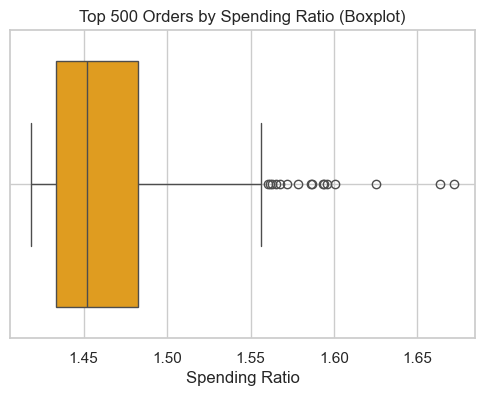

In [351]:
# Sort and select top 500 by spending ratio
top500_spending = df_orders.sort_values(by="spending_ratio", ascending=False).head(500)

# Now plot the boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=top500_spending["spending_ratio"], color="orange")
plt.title("Top 500 Orders by Spending Ratio (Boxplot)")
plt.xlabel("Spending Ratio")
plt.grid(True)
plt.show()
